In [1]:
# This script plots and creates gifs of generated flows. 

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pathToProject = 'skola/Fourier-Neural-Operator'

%cd
%cd $pathToProject/src/fno/model
from Utilities import *

plt.rcParams['text.usetex'] = False
%config InlineBackend.figure_format = 'retina'

# res = '32x32'
# res = '128x128'
res = '1024x1024'

# Specify to plot prediction or ground truth
# print_res = 'pred'
print_res = 'true'

# Specify to bicube comparison or not
bicube_compare = False

t = 39 # Timestep into the future to plot
dt = 1 # Sample rate of the flow

C:\Users\erikn
C:\Users\erikn\skola\Fourier-Neural-Operator\src\fno\model


In [2]:
# This segment finds the max and min vorticity values of the specified timestep between the true and predicted flow to plot a mutual color bar

%cd
%cd $pathToProject

true_path = r'src/fno/output-flows/{}/true_{}_result_t{}.pt'.format(res, res, dt)
fno_path = r'src/fno/output-flows/{}/fno_{}_result_t{}.pt'.format(res, res, dt)
if bicube_compare:
    biqube_path = r'src/fno/output-flows/{}/biqube_{}_result_t{}.pt'.format(res, res, dt)

true = torch.load(true_path).detach().float()#.numpy()
fno = torch.load(fno_path).detach().float()#.numpy()
if bicube_compare:
    biqube = torch.load(biqube_path).detach().float()#.numpy()
    biqube = biqube[0,...]
    biqube = biqube[None,...]

if bicube_compare:
    # comparison
    print(biqube.shape)
    fno = torch.abs(true - fno).float()
    biqube = torch.abs(true - biqube).float()
    print(biqube.shape)

    cmax_fno = torch.max(fno[0,:,:,t])
    cmax_biqube = torch.max(biqube[0,...])
    cmax = torch.max(cmax_fno, cmax_biqube)

    cmin_fno = torch.min(fno[0,:,:,t])
    cmin_biqube = torch.min(biqube[0,...])
    cmin = torch.max(cmin_fno, cmin_biqube)
else:
    cmax_true = torch.max(true[0,...])
    cmax_fno = torch.max(fno[0,...])
    cmax = torch.max(cmax_true, cmax_fno)
    
    cmin_true = torch.min(true[0,...])
    cmin_fno = torch.min(fno[0,...])
    cmin = torch.min(cmin_true, cmin_fno)
    
    pred = fno

C:\Users\erikn
C:\Users\erikn\skola\Fourier-Neural-Operator


C:\Users\erikn
C:\Users\erikn\skola\Fourier-Neural-Operator


MovieWriter ffmpeg unavailable; using Pillow instead.


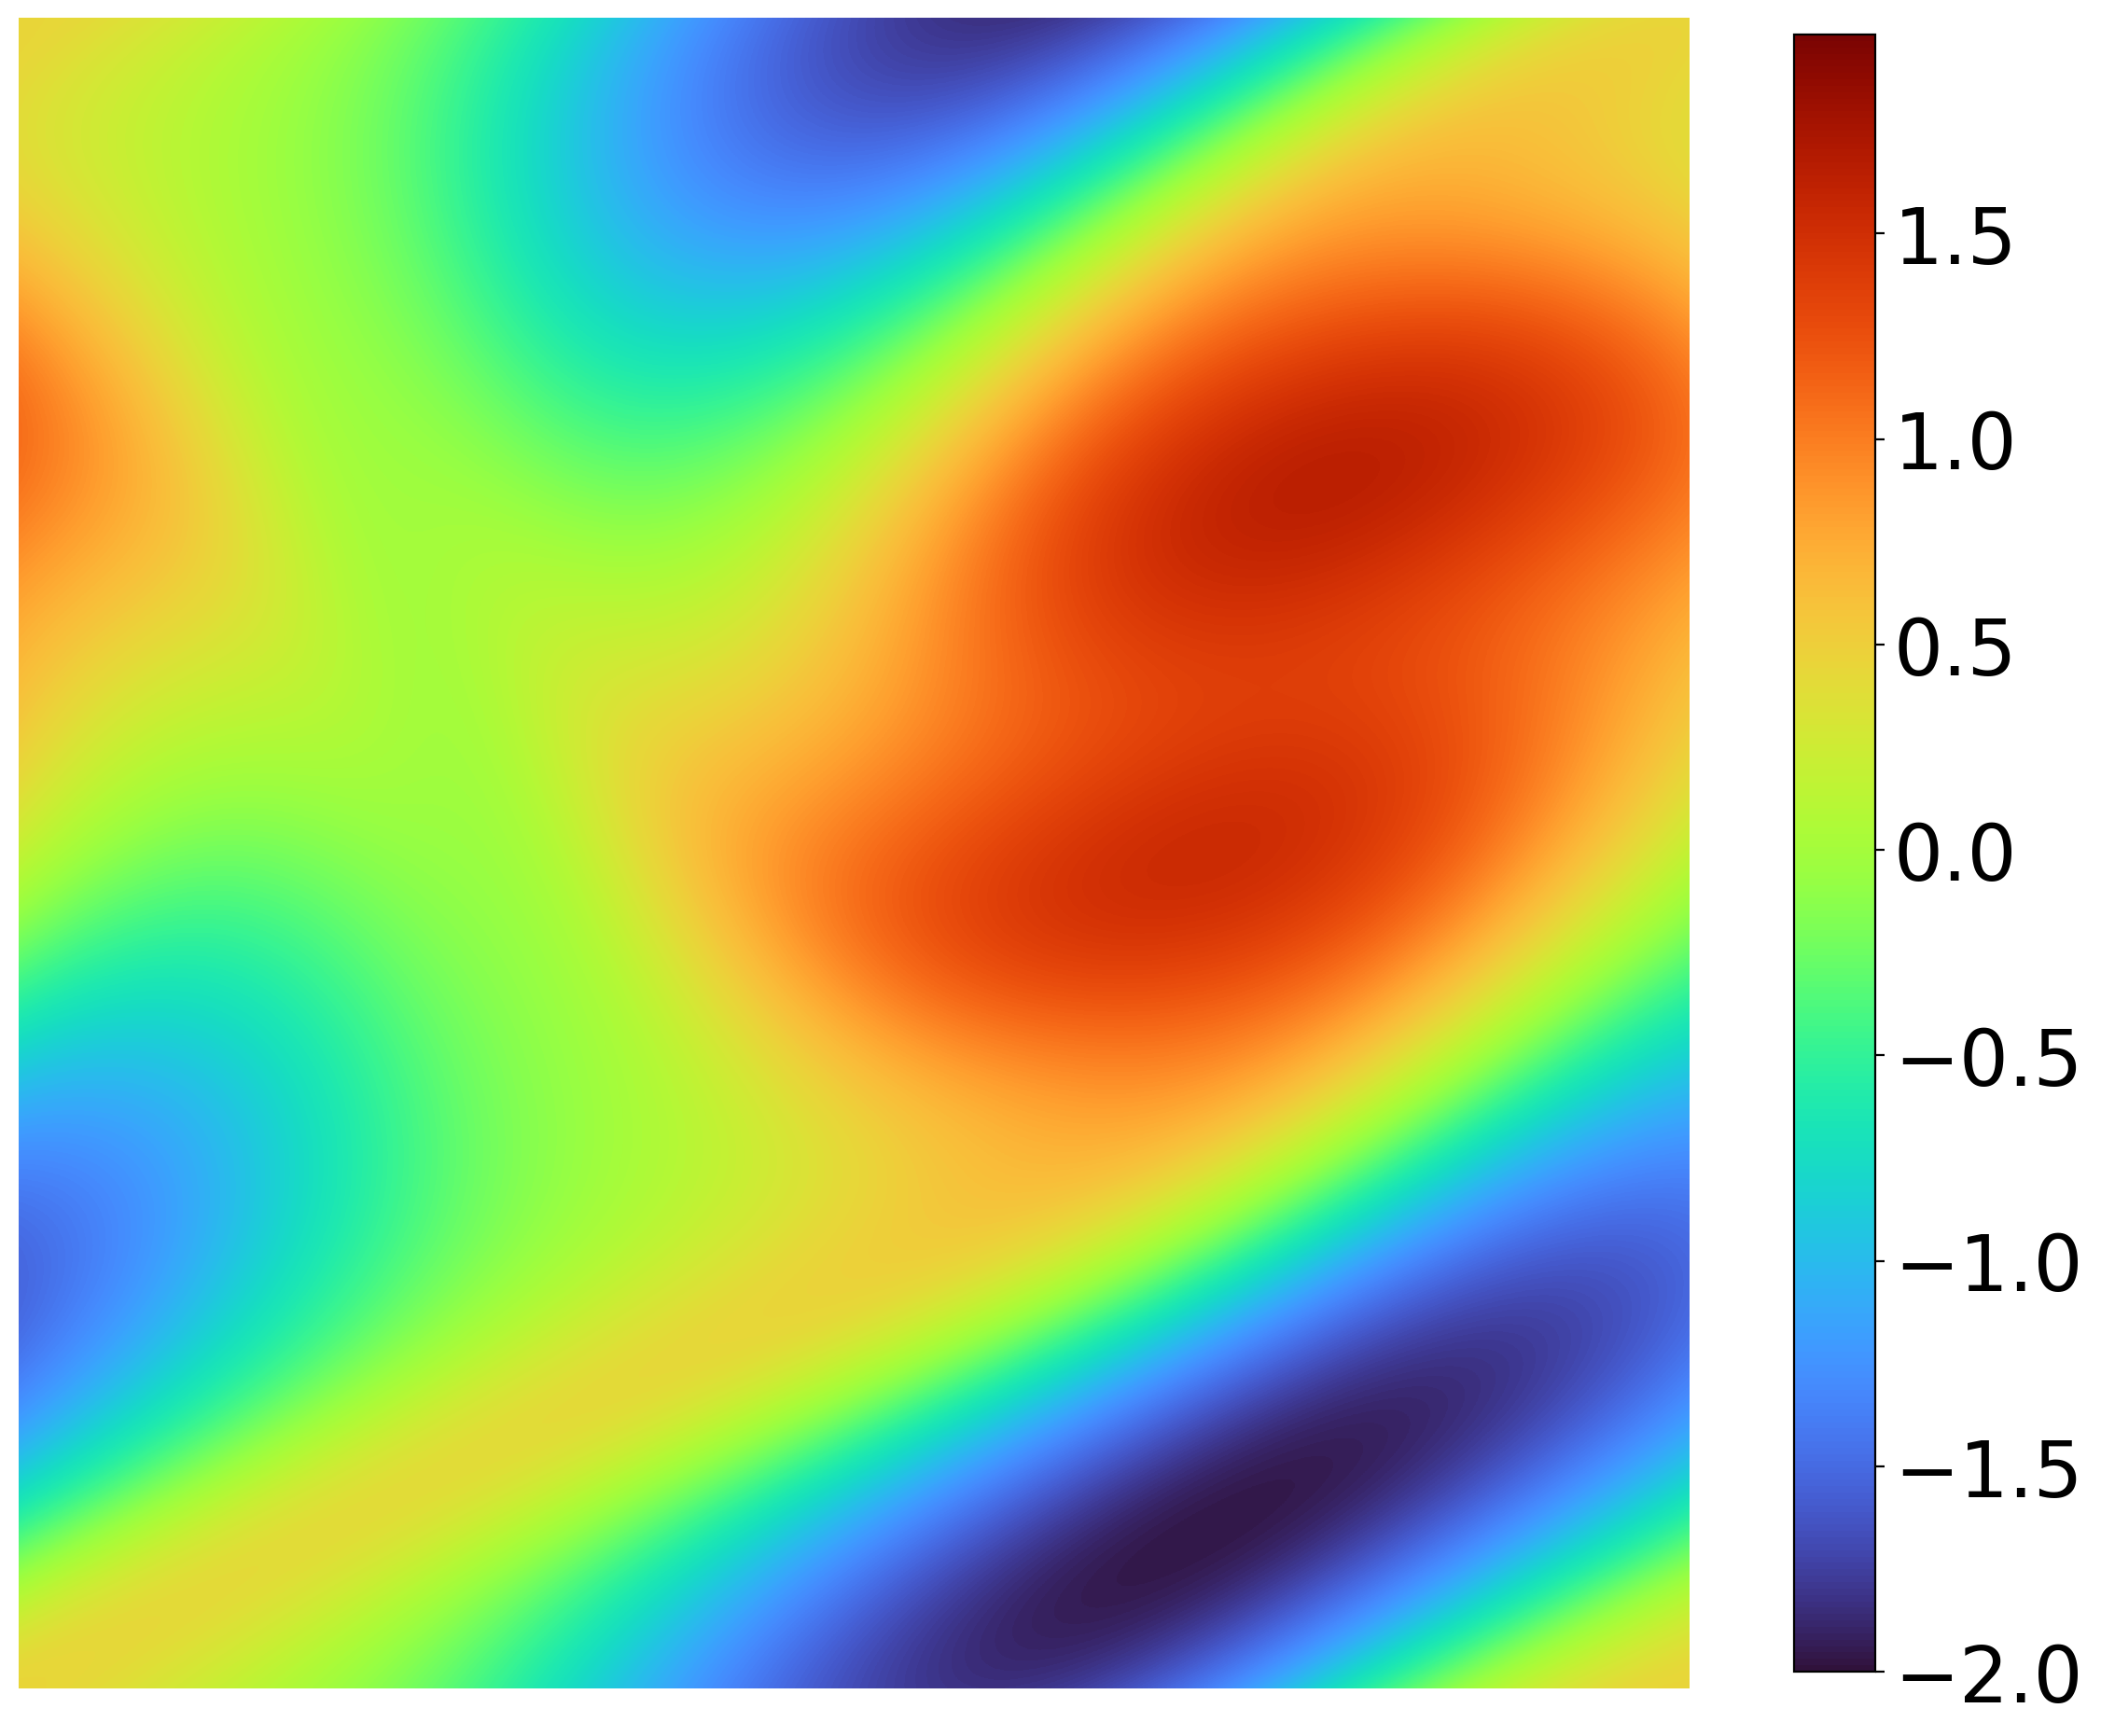

In [3]:
# This segment creates a gif of the specified flow 
# Ready to run after the second segment. If plots were made first, re-run the script for this to work.

%cd
%cd $pathToProject

if print_res == 'true':
    path = 'src/fno/output-flows/{}/true_t{}_TEST'.format(res, dt)
    CreateGif(true, path, print_res, cmin, cmax)
elif print_res == 'pred':
    path = 'src/fno/output-flows/{}/pred_t{}_TEST'.format(res, dt)
    CreateGif(pred, path, print_res, cmin, cmax)

C:\Users\erikn
C:\Users\erikn\skola\Fourier-Neural-Operator
tensor(-2.) tensor(1.9844)
torch.Size([1, 1024, 1024, 40]) torch.Size([1, 1024, 1024, 40])
torch.Size([1024, 1024])


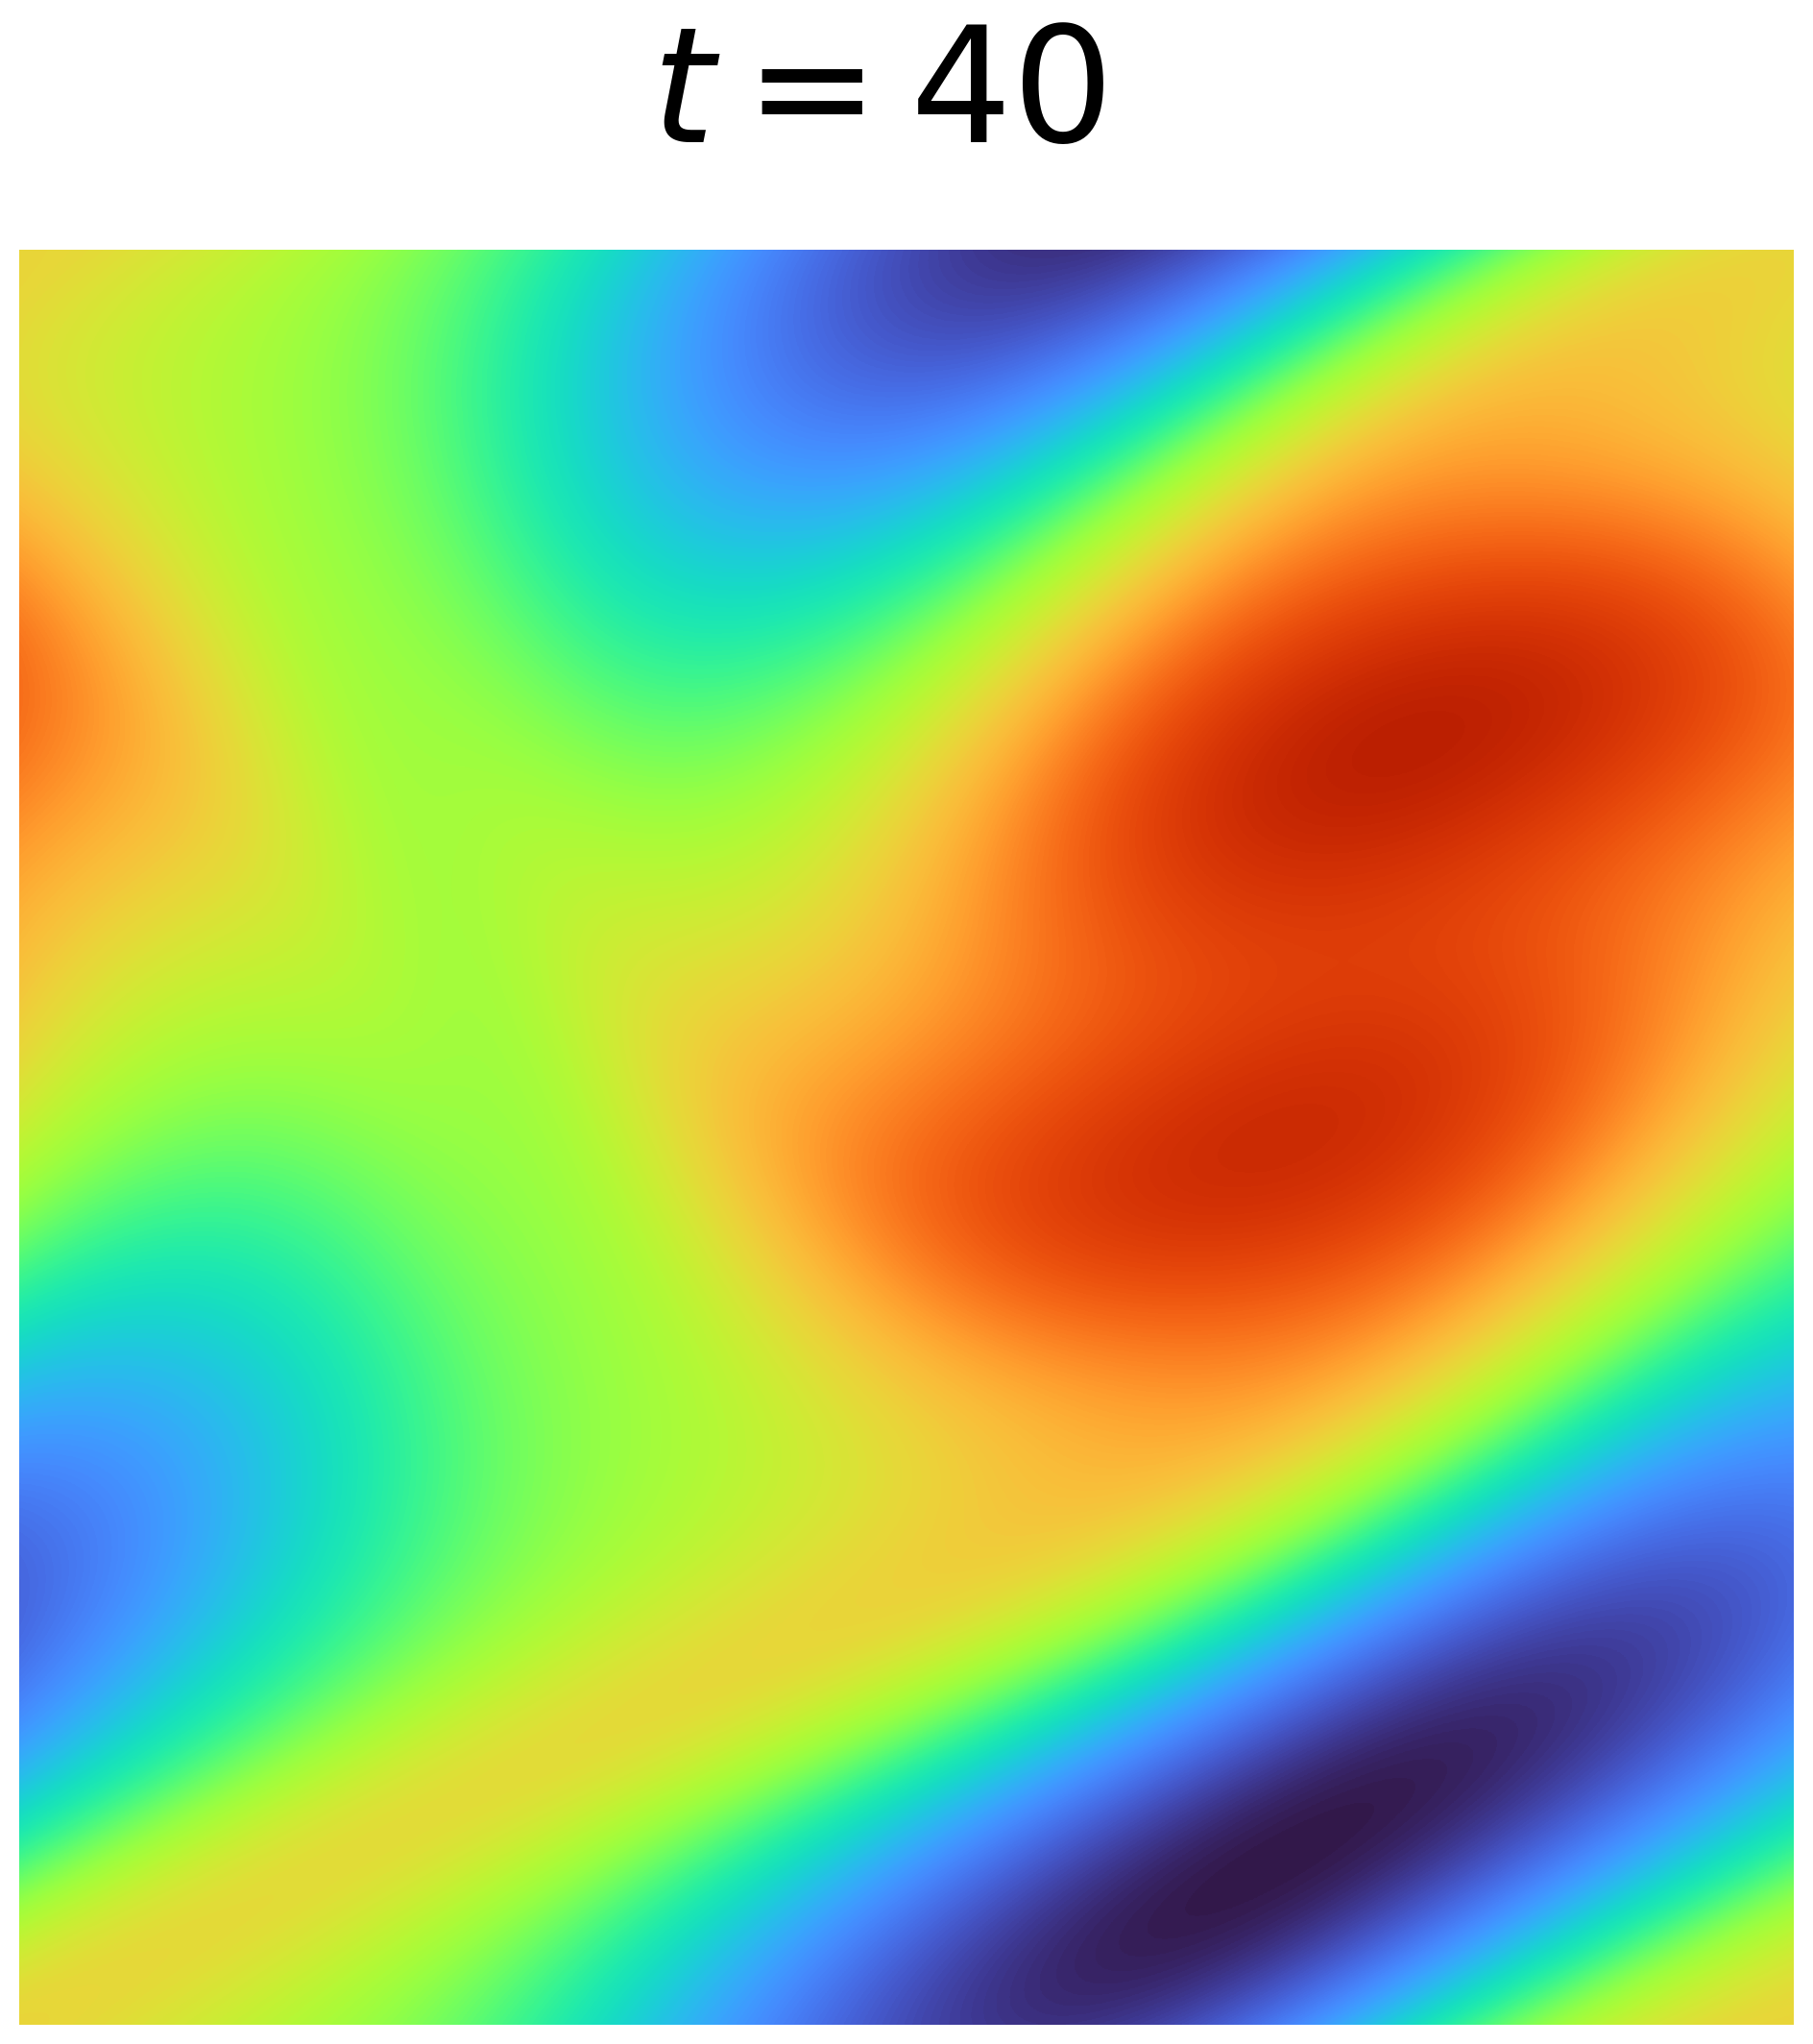

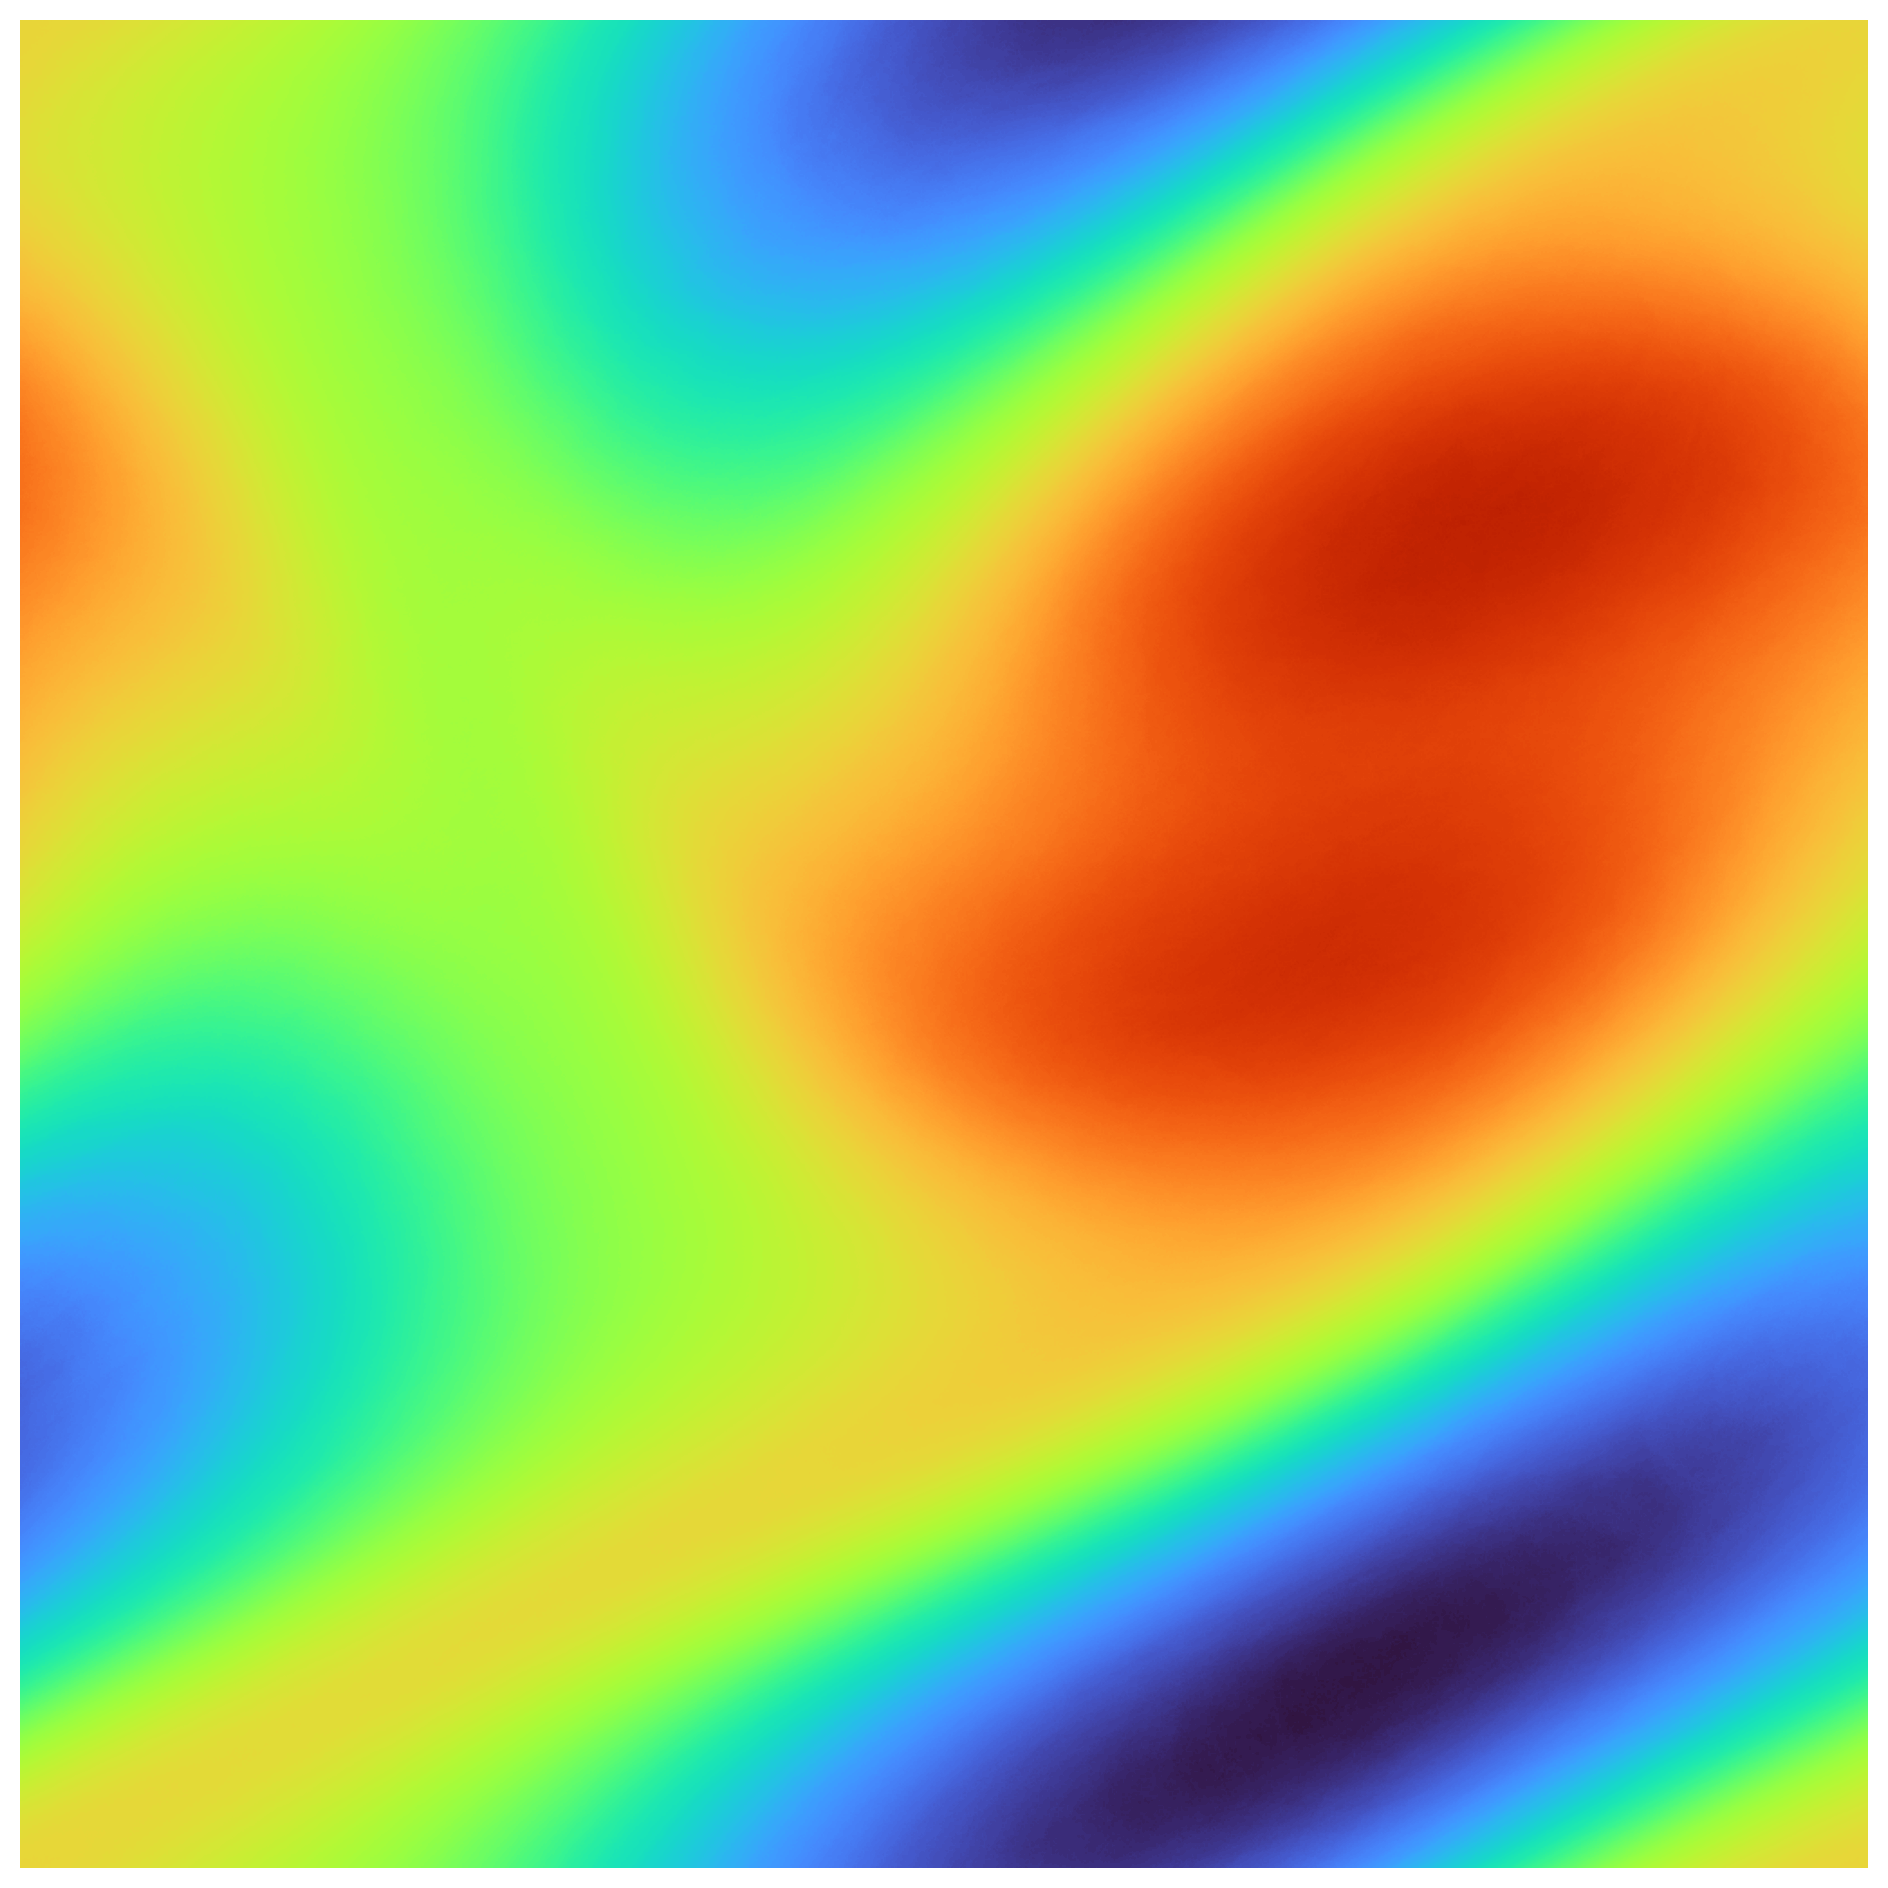

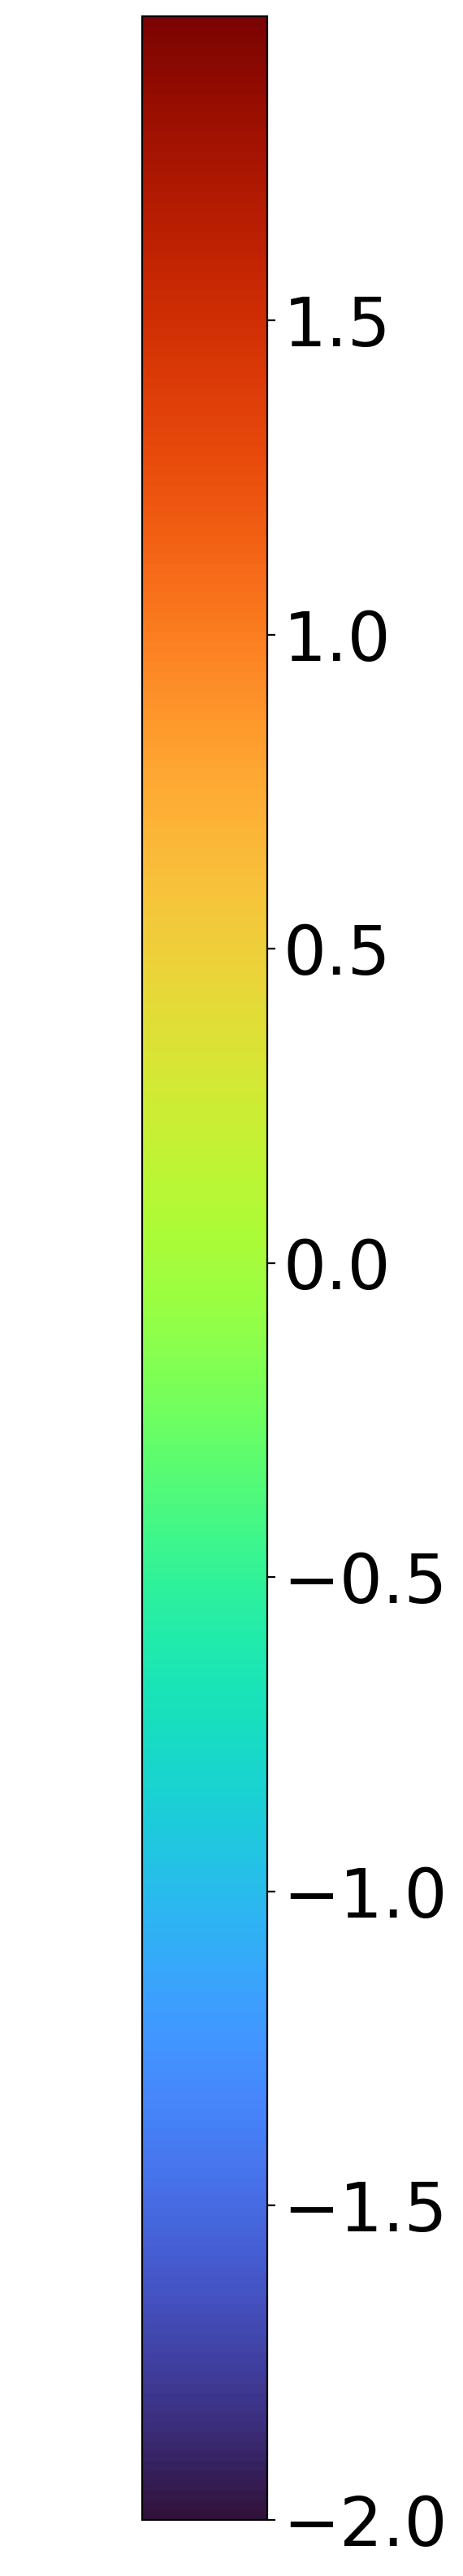

In [12]:
# This segment plots a snapshot of the flow at the specified timestep into the future
# Ready to run after the second segment. If gifs were made first, re-run the script for this to work.

%cd
%cd $pathToProject

# t = 19
fs = 60 # Fontsize
path = r'src/fno/output-flows/{}/'.format(res)

print(cmin,cmax)

if bicube_compare:
    fig = plt.figure(figsize=(12,12))
    im = plt.imshow(fno[0,:,:,t], extent=[0,100,0,1], aspect=100, cmap='turbo')
    plt.axis('off')
    plt.clim(cmin,cmax)
    # colorbar = plt.colorbar(im)
    plt.title('FNO', fontsize=fs)
    # plt.box_aspect(1)
    plt.savefig(path+'fno_bicubic_comparison_{}_TEST.png'.format(t+1))


    fig = plt.figure(figsize=(12,12))
    plt.imshow(pred[0,:,:,t].numpy(), extent=[0,100,0,1], aspect=100, cmap='turbo')
    plt.axis('off')
    plt.clim(cmin,cmax)
    # plt.box_aspect(1)
    plt.title('Bicubic', fontsize=fs)
    plt.savefig(path+'bicube_bicubic_comparison_{}_TEST.png'.format(t+1))


    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fraction = 1  # .05
    norm = mpl.colors.Normalize(vmin=cmin, vmax=cmax)
    cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='turbo'),
                              ax=ax, pad=.05, 
                              fraction=fraction,)
    cbar.ax.tick_params(labelsize=30)
    ax.axis('off')
    plt.savefig(path+'cbar_bicubic_comparison_TEST.png')
else:
    print(true.shape, pred.shape)
    
    fig = plt.figure(figsize=(12,12))
    im = plt.imshow(true[0,:,:,t], extent=[0,100,0,1], aspect=100, cmap='turbo')
    plt.axis('off')
    plt.clim(cmin,cmax)
    # colorbar = plt.colorbar(im)
    plt.suptitle('$t={}$'.format(t+1), fontsize=fs)
    # plt.box_aspect(1)

    if t == 0:
        plt.title('True', rotation='vertical',x=-0.05,y=0.45, fontsize=fs)
    plt.savefig(path+'/true_{}_TEST.png'.format(t+1))

    print(pred[0,:,:,t].shape)



    fig = plt.figure(figsize=(12,12))
    plt.imshow(pred[0,:,:,t].numpy(), extent=[0,100,0,1], aspect=100, cmap='turbo')
    plt.axis('off')
    plt.clim(cmin,cmax)
    # plt.box_aspect(1)

    if t == 0:
        plt.title('Prediction', rotation='vertical',x=-0.05,y=0.35, fontsize=fs)
    plt.savefig(path+'/pred_{}_TEST.png'.format(t+1))



    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    fraction = 1  # .05
    norm = mpl.colors.Normalize(vmin=cmin, vmax=cmax)
    cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='turbo'),
                              ax=ax, pad=.05, 
                              fraction=fraction,)
    cbar.ax.tick_params(labelsize=30)
    ax.axis('off')
    plt.savefig(path+'cbar_TEST.png')